# EDA of the Loan Dataset
- Check all columns for nulls, bad values, inconsistent variables, plan for pre-processing

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('data/LoansDataset.csv')

/var/folders/bh/crnltg950_n8l07mfm97qdtc0000gn/T/ipykernel_26504/2490376750.py:1: DtypeWarning: Columns (10,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/LoansDataset.csv')


In [4]:
pd.DataFrame(df.info()).columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       111107 non-null  object 
 1   Customer ID                   111107 non-null  object 
 2   Loan Status                   111107 non-null  object 
 3   Current Loan Amount           111107 non-null  int64  
 4   Term                          111107 non-null  object 
 5   Credit Score                  89769 non-null   float64
 6   Years in current job          106414 non-null  object 
 7   Home Ownership                111107 non-null  object 
 8   Annual Income                 89769 non-null   float64
 9   Purpose                       111107 non-null  object 
 10  Monthly Debt                  111107 non-null  object 
 11  Years of Credit History       111107 non-null  float64
 12  Months since last delinquent  52104 non-null

RangeIndex(start=0, stop=0, step=1)

##### Observation: there are nulls in columns #5 Credit Score, #6 Years in current job, #8 Annual Income, #12 Months since last delinquent, #17 Bankruptices, #18 Tax Liens. These will be explored in their corresponding EDA sections below to determine how they will be addressed.

# 0. EDA of Loan ID

In [5]:
df['Loan ID'].head()

0    6cf51492-02a2-423e-b93d-676f05b9ad53
1    552e7ade-4292-4354-9ff9-c48031697d72
2    9b5e32b3-8d76-4801-afc8-d729d5a2e6b9
3    5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe
4    1450910f-9495-4fc9-afaf-9bdf4b9821df
Name: Loan ID, dtype: object

In [6]:
df['Loan ID'].duplicated().sum()

np.int64(22197)

##### Observation: Loan ID is a unique identifier for loan information, but there are 22,197 duplicates in this feature. These duplicates need to be addressed. There should be no duplicated Loan ID by the end of data cleaning.

### *Decision: Drop duplicates

In [7]:
df1_drop_duplicates = df.drop_duplicates()
df1_drop_duplicates['Loan ID'].duplicated().sum()

np.int64(16328)

##### Observation: After dropping all duplicated rows in the dataframe, there are still 16,328 duplicated Loan ID. This means that they are not identical in other features. We need to check where they differ.

In [8]:
df1_drop_duplicates[df1_drop_duplicates['Loan ID'].duplicated()].head(3)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
88910,a9382c50-9176-4639-9fa1-6bdf32fe9702,6fdbbbd6-0e34-4039-9f47-c371d352bf40,Fully Paid,20891,Long Term,714.0,10+ years,Home Mortgage,88537.0,Debt Consolidation,1719.09,18.0,NaN,13,0,56708,60456,0.0,0.0
88912,e7569ce9-f3ec-4461-9604-ccefe9164788,b9aefd67-0d4f-4180-805f-6c1870e280c3,Fully Paid,11000,Long Term,707.0,7 years,Rent,52640.0,Debt Consolidation,666.76,8.8,14.0,7,0,1946,11446,0.0,0.0
88913,96d15e73-541a-44be-8c11-b2e46d73d1b8,78281f18-48b5-40d4-9064-be5d18263d04,Fully Paid,5924,Short Term,716.0,7 years,Rent,97743.0,Debt Consolidation,2248.08,22.0,NaN,5,0,62261,69956,0.0,0.0


In [9]:
df1_drop_duplicates[df1_drop_duplicates['Loan ID'] == 'a9382c50-9176-4639-9fa1-6bdf32fe9702'].T

,56850,88910
Loan ID,a9382c50-9176-4639-9fa1-6bdf32fe9702,a9382c50-9176-4639-9fa1-6bdf32fe9702
Customer ID,6fdbbbd6-0e34-4039-9f47-c371d352bf40,6fdbbbd6-0e34-4039-9f47-c371d352bf40
Loan Status,Fully Paid,Fully Paid
Current Loan Amount,20891,20891
Term,Long Term,Long Term
Credit Score,714.0,714.0
Years in current job,10+ years,10+ years
Home Ownership,Home Mortgage,Home Mortgage
Annual Income,88537.0,88537.0
Purpose,Debt Consolidation,Debt Consolidation


In [10]:
differences = df1_drop_duplicates.iloc[56850].compare(df1_drop_duplicates.iloc[88910])
differences

,self,other
Monthly Debt,1719.09,1719.09
Maximum Open Credit,60456,60456


In [11]:
print(differences.apply(lambda x: [type(x[0]), type(x[1])]))

                              self            other
Monthly Debt         <class 'str'>  <class 'float'>
Maximum Open Credit  <class 'str'>    <class 'int'>


/var/folders/bh/crnltg950_n8l07mfm97qdtc0000gn/T/ipykernel_26504/2944679779.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(differences.apply(lambda x: [type(x[0]), type(x[1])]))


##### Observation: it appears that the rows are duplicated because in the Monthly Debt and Maximum Open Credit features, the numbers are actually strings. 

### *Decision: Clean Monthly Debt (feature #10) and Maximum Open Credit (feature #16) columns from strings to numbers. Then remove duplicates again. Once Loan ID is verified to contain no duplicates, then drop feature, because it holds no predictive power with regards to the target.

# 1. EDA of Customer ID

In [12]:
df1_drop_duplicates['Customer ID'].duplicated().sum()

np.int64(16328)

##### Observation: Customers may have more than one loan, so duplicated customer ID's are allowed. However, the number of duplicates is identical to that of Loan ID. This indicates that there is only one loan per customer in this dataset. In that case, the customer ID feature has no inherent value and should be dropped.

### *Decision: Drop Customer ID feature

In [13]:
df2_drop_customer = df1_drop_duplicates.drop(columns=['Customer ID'])
df2_drop_customer.columns

Index(['Loan ID', 'Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Years in current job', 'Home Ownership', 'Annual Income', 'Purpose',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

# 2. EDA of Loan Status

In [14]:
df2_drop_customer['Loan Status'].value_counts()

Loan Status
Fully Paid     80065
Charged Off    25173
Name: count, dtype: int64

##### Observation: the Loan Status feature indicates whether the loan was paid back or defaulted. This is what the model should aim to predict. 

### *Decision: Loan Status will be the categorical target column (y)

# 3. EDA of Current Loan Amount

In [15]:
df2_drop_customer['Current Loan Amount']

0         12232
1         25014
2         16117
3         11716
4          9789
          ...  
111102    15654
111103    15237
111104    10413
111105    34447
111106     9209
Name: Current Loan Amount, Length: 105238, dtype: int64

In [16]:
df2_drop_customer['Current Loan Amount'].describe()

count    1.052380e+05
mean     1.211641e+07
std      3.261291e+07
min      4.910000e+02
25%      8.174000e+03
50%      1.421950e+04
75%      2.400100e+04
max      1.000000e+08
Name: Current Loan Amount, dtype: float64

(array([92500.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 12738.]),
 array([4.91000000e+02, 1.00004418e+07, 2.00003926e+07, 3.00003434e+07,
        4.00002942e+07, 5.00002450e+07, 6.00001958e+07, 7.00001466e+07,
        8.00000974e+07, 9.00000482e+07, 9.99999990e+07]),
 <BarContainer object of 10 artists>)

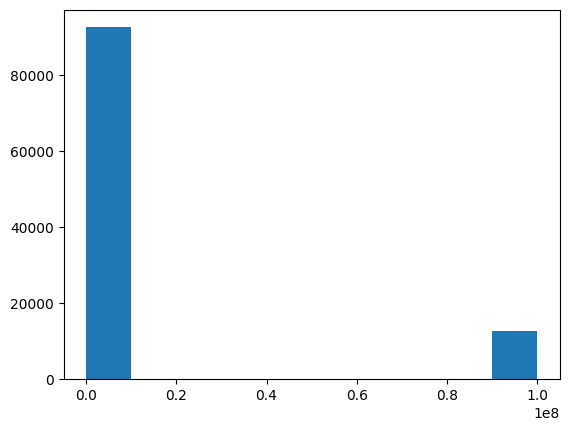

In [17]:
plt.hist(df2_drop_customer['Current Loan Amount'])

In [18]:
df2_drop_customer[df2_drop_customer['Current Loan Amount'] > 500000].value_counts()

Loan ID                               Loan Status  Current Loan Amount  Term        Credit Score  Years in current job  Home Ownership  Annual Income  Purpose             Monthly Debt  Years of Credit History  Months since last delinquent  Number of Open Accounts  Number of Credit Problems  Current Credit Balance  Maximum Open Credit  Bankruptcies  Tax Liens
000dada0-f2a3-4d6d-b9d2-284939e7cc7d  Fully Paid   99999999             Short Term  740.0         2 years               Rent            84191.0        Debt Consolidation  1192.71       21.1                     16.0                          22                       0                          11924                   18458                0.0           0.0          1
a9ecbff9-5b5b-4089-afb8-02e0b231fb1b  Fully Paid   99999999             Short Term  743.0         10+ years             Home Mortgage   194293.0       moving              3027.73       23.8                     42.0                          16                       0       

In [19]:
(df2_drop_customer[df2_drop_customer['Current Loan Amount'] == 99999999].count())['Current Loan Amount']

np.int64(12738)

In [20]:
(df2_drop_customer[df2_drop_customer['Current Loan Amount'] > 500000].count())['Current Loan Amount']

np.int64(12738)

##### Observation: it appears that all of the outliers have a Current Loan Amount of 99999999. Based on the histogram, the outliers are obviously not in line with the rest of the Current Loan Amounts. Based on the fact that there are no values between 500,000 and 99,999,999, we can safely say that these values are erroneous and those rows should be dropped.

### *Decision: drop all rows where the Current Loan Amount is equal to 99999999

In [21]:
df3_drop_loan_amount = df2_drop_customer[df2_drop_customer['Current Loan Amount'] != 99999999].copy()

In [22]:
df3_drop_loan_amount['Current Loan Amount'].max()

np.int64(35875)

(array([ 7124., 15247., 18579., 12885., 12458.,  9761.,  6023.,  3403.,
         2767.,  4253.]),
 array([  491. ,  4029.4,  7567.8, 11106.2, 14644.6, 18183. , 21721.4,
        25259.8, 28798.2, 32336.6, 35875. ]),
 <BarContainer object of 10 artists>)

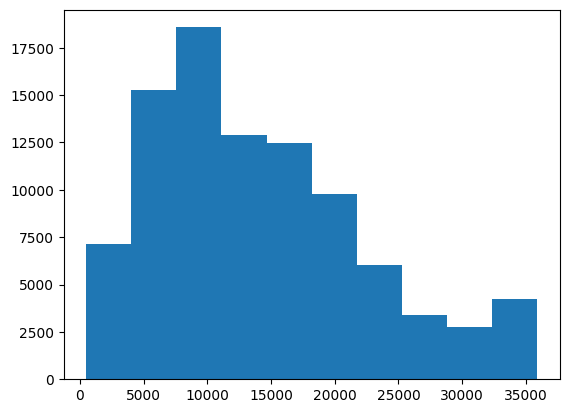

In [23]:
plt.hist(df3_drop_loan_amount['Current Loan Amount'])

# 4. EDA of Term

In [24]:
df3_drop_loan_amount['Term'].value_counts()

Term
Short Term    66535
Long Term     25965
Name: count, dtype: int64

(array([66535.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 25965.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

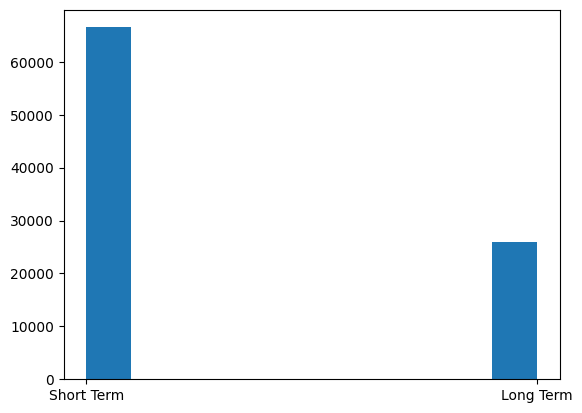

In [25]:
plt.hist(df3_drop_loan_amount['Term'])

##### Observation: Term appears to be categorical binary, with a value of either Short Term or Long Term. 

### *Decision: Term will be One Hot Encoded as binary, dropping the second column. 

# 5. EDA of Credit Score

In [26]:
df3_drop_loan_amount['Credit Score']

0         7280.0
1         7330.0
2         7240.0
3         7400.0
4         6860.0
           ...  
111102     686.0
111103     706.0
111104     719.0
111105     626.0
111106     708.0
Name: Credit Score, Length: 92500, dtype: float64

(array([6.6118e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 3.9000e+01, 7.8000e+02, 4.2250e+03]),
 array([ 585. , 1277.5, 1970. , 2662.5, 3355. , 4047.5, 4740. , 5432.5,
        6125. , 6817.5, 7510. ]),
 <BarContainer object of 10 artists>)

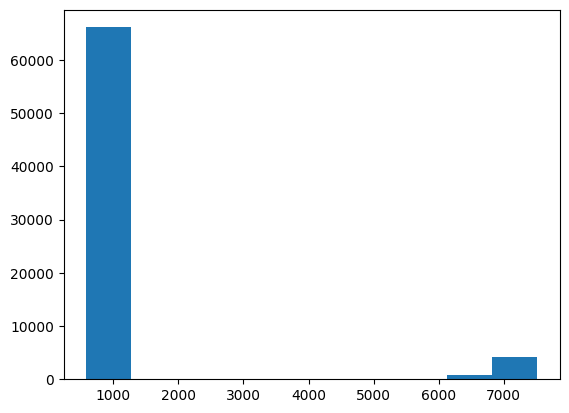

In [27]:
plt.hist(df3_drop_loan_amount['Credit Score'])

##### Observation: the Credit Score feature should have a value between 0 and 800, indicating the riskiness of the borrower's credit history. Based on the histogram, there is a cluster of values that are much higher than the acceptable range of values. These values are most likely incorrect, but will require further EDA to decide next steps.

In [28]:
df3_drop_loan_amount[df3_drop_loan_amount['Credit Score'] > 800]['Credit Score']

0       7280.0
1       7330.0
2       7240.0
3       7400.0
4       6860.0
         ...  
5039    7010.0
5040    7180.0
5041    7110.0
5042    7330.0
5043    6920.0
Name: Credit Score, Length: 5044, dtype: float64

In [29]:
temp_df = df3_drop_loan_amount[df3_drop_loan_amount['Credit Score'] > 800]['Credit Score']
temp_df.apply(lambda X: X % 10 == 0).value_counts()

Credit Score
True    5044
Name: count, dtype: int64

In [30]:
temp2_df = temp_df.apply(lambda X: X / 10)
temp2_df.describe()

count    5044.000000
mean      710.904639
std        30.606278
min       585.000000
25%       695.000000
50%       719.000000
75%       735.000000
max       751.000000
Name: Credit Score, dtype: float64

(array([  19.,   44.,   83.,  137.,  243.,  387.,  612.,  912., 1342.,
        1265.]),
 array([585. , 601.6, 618.2, 634.8, 651.4, 668. , 684.6, 701.2, 717.8,
        734.4, 751. ]),
 <BarContainer object of 10 artists>)

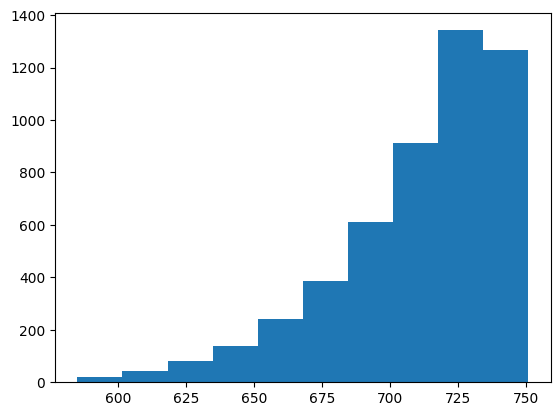

In [31]:
plt.hist(temp2_df)

##### Observation: it appears that all of the "bad values" are divisible by 10, and once divided by 10, yield a distribution that falls within the Credit Score acceptable values range of 0-800. This indicates that these "bad values" may have been accidentally altered with an extra "0" at the end, and can be corrected by removing the last "0" in the value. 

### *Decision: for all Credit Scores above 800, remove the last 0.  

In [32]:
df4_adj_credit = df3_drop_loan_amount.copy()
df4_adj_credit['Credit Score'] = df3_drop_loan_amount['Credit Score'].apply(lambda X: X / 10 if X > 800 else X)
df4_adj_credit['Credit Score'].describe()

count    71162.000000
mean       715.909081
std         28.541664
min        585.000000
25%        703.000000
50%        722.000000
75%        738.000000
max        751.000000
Name: Credit Score, dtype: float64

(array([  226.,   418.,   698.,  1328.,  2378.,  4445.,  7593., 13272.,
        18404., 22400.]),
 array([585. , 601.6, 618.2, 634.8, 651.4, 668. , 684.6, 701.2, 717.8,
        734.4, 751. ]),
 <BarContainer object of 10 artists>)

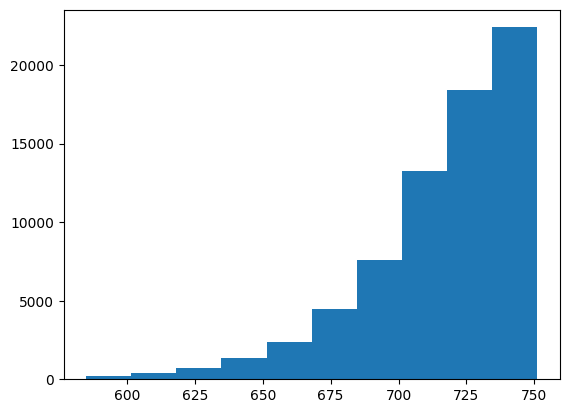

In [33]:
plt.hist(df4_adj_credit['Credit Score'])

In [34]:
df4_adj_credit['Credit Score'].isna().sum()

np.int64(21338)

In [35]:
df4_adj_credit['Credit Score'].notna().sum()

np.int64(71162)

In [36]:
df4_adj_credit['Credit Score'].isna().sum() / df4_adj_credit['Credit Score'].count()

np.float64(0.2998510440965684)

##### Observation: there are 21,338 rows with null values in Credit Score. Credit Score is indiciative of credit worthiness, and may be an important variable in predicting whether or not a loan will default. With roughly 30% of the dataset missing, how these nulls are addressed could greatly impact the model. Imputing the missing values could misleadingly strengthen existing correlations. If the nulls are dropped, 71,162 datapoints would be left in the dataset. Although a significant amount of data will be lost, because there will still be a large dataset remaining, it is better to drop the nulls. 

### *Decision: Drop nulls in Credit Score

In [37]:
df5_drop_nulls = df4_adj_credit.dropna(subset=['Credit Score'])
df5_drop_nulls['Credit Score'].isna().sum()

np.int64(0)

# 6. EDA of Years in current job

In [38]:
df5_drop_nulls['Years in current job'].value_counts()

Years in current job
10+ years    22235
2 years       6454
3 years       5841
< 1 year      5758
5 years       4828
1 year        4562
4 years       4314
6 years       4048
7 years       3966
8 years       3310
9 years       2777
Name: count, dtype: int64

In [39]:
df5_drop_nulls['Years in current job'].isna().sum()

np.int64(3069)

##### Observation: there are 11 categories in this feature, and 3069 null values. It is not obvious whether these values are missing at complete random, or are missing for a reason. Looking at the categories, "< 1 year" may or may not be meant to include those without a job. It is possible that the null values represent those customers who do not have a job. A longer tenure at their job may indicate financial stability and credit worthiness. These values should be ordered categorically before entering the model to capture any correlation.  

### *Decision: impute null values as the constant 0. Encode feature with Ordinal Encoder, where '0': 0, '< 1 year': 1, '2 years': 2, '3 years': 3, '4 years: 4', and so forth. 

# 7. EDA of Home Ownership

In [40]:
df5_drop_nulls['Home Ownership'].value_counts()

Home Ownership
Home Mortgage    34243
Rent             30198
Own Home          6576
HaveMortgage       145
Name: count, dtype: int64

##### Observation: Home Ownership should contain one of 3 values: "Rent", "home Mortgage", and "Own". There are 145 instances of HaveMortgage. This appears to be mislabeled data and should be corrected to "Home Mortgage".

### *Decision: change all "HaveMortgage" to "Home Mortgage"

# 8. EDA of Annual Income

In [41]:
df5_drop_nulls['Annual Income'].describe()

count    7.116200e+04
mean     7.214447e+04
std      5.782705e+04
min      4.033000e+03
25%      4.453700e+04
50%      6.139650e+04
75%      8.642575e+04
max      8.713547e+06
Name: Annual Income, dtype: float64

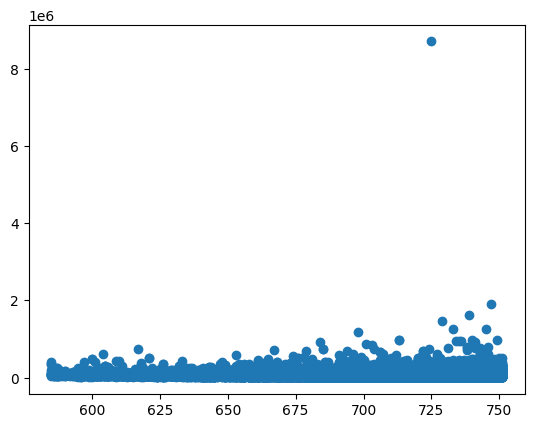

In [42]:
plt.scatter(df5_drop_nulls['Credit Score'], df5_drop_nulls['Annual Income'])

##### Observation: there appears to be a significant outlier in Annual Income. In order to drop the outlier(s), the standard deviation would need to be calculated to set a threshold. Calculating the standard deviation before the split would cause data leakage. 

In [43]:
df5_drop_nulls[df5_drop_nulls['Annual Income'] > df5_drop_nulls['Annual Income'].std()*10]['Annual Income'].count()

np.int64(48)

In [44]:
df5_drop_nulls[df5_drop_nulls['Annual Income'] > df5_drop_nulls['Annual Income'].std()*15]['Annual Income'].count()

np.int64(17)

In [45]:
df5_drop_nulls[df5_drop_nulls['Annual Income'] > df5_drop_nulls['Annual Income'].std()*20]['Annual Income'].count()

np.int64(7)

##### Observation: at 10 standard deviations, 48 rows would be dropped. At 15 standard deviations, 17 rows would be dropped. At 20 standard deviations, 7 rows would be dropped. 

In [46]:
df6_drop_outlier = df5_drop_nulls.loc[df5_drop_nulls['Annual Income'] < df5_drop_nulls['Annual Income'].std()*20].copy()
df6_drop_outlier['Annual Income'].describe()

count     71155.000000
mean      71906.319092
std       46127.706348
min        4033.000000
25%       44537.000000
50%       61391.000000
75%       86410.500000
max      987800.000000
Name: Annual Income, dtype: float64

In [47]:
df6_drop_outlier[df6_drop_outlier['Annual Income'] > df5_drop_nulls['Annual Income'].std()*5]['Annual Income'].count()

np.int64(378)

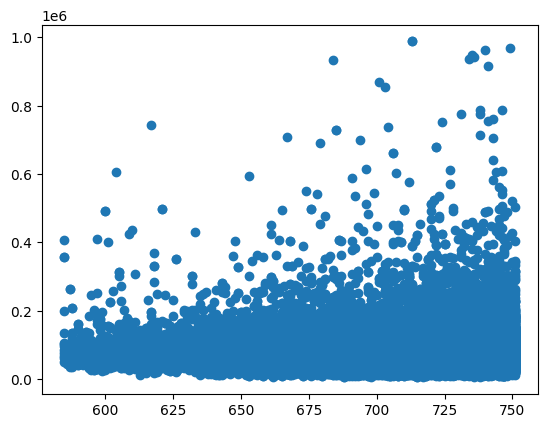

In [48]:
plt.scatter(df6_drop_outlier['Credit Score'], df6_drop_outlier['Annual Income'])

##### Observation: After dropping values that are more than 20 standard deviations away, there are still many outliers, but it is representative of the real world distribution. For this reason, no more outliers will be dropped, but an appropriate scaler should be applied.

### *Decision: drop values that are more than 20 standard deviations away from the mean AFTER train/test/val split, using a Custom Transformer to save the value of the mean & standard deviation from train to be applied to test and val. Then use the RobustScaler to reduce the impact of outliers. 

In [49]:
df6_drop_outlier['Annual Income'].isna().sum()

np.int64(0)

##### Observation: there are no more nulls left in Annual Income

# 9. EDA of Purpose

In [50]:
pd.DataFrame(df6_drop_outlier['Purpose'].value_counts())

,count
Purpose,
Debt Consolidation,55827
other,4390
Home Improvements,4098
Other,2281
Business Loan,1172
Buy a Car,888
Medical Bills,818
Buy House,496
Take a Trip,387


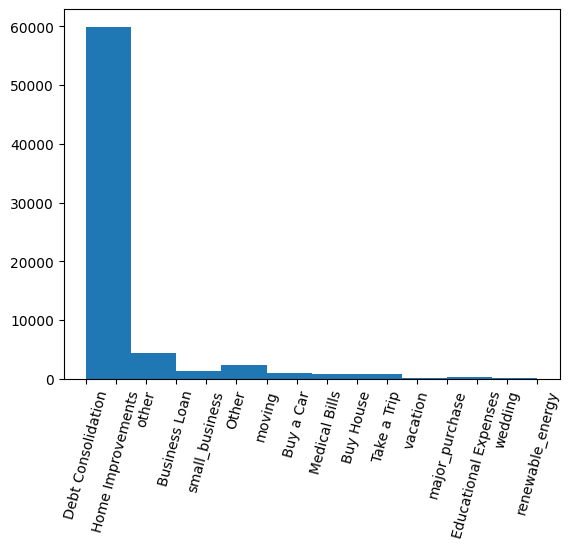

In [51]:
plt.hist(df6_drop_outlier['Purpose'])
plt.xticks(rotation=75);

##### Observation: the Purpose of most loans is Debt Consolidation. The other purposes often overlap, and have similarities to each other. It may be more insightful to see if there is a correlation between whether or not the purpose is Debt Consolidation and loan default.

### *Decision: transform into a binary category called Debt Consolidation

# 10. EDA of Monthly Debt

In [52]:
df6_drop_outlier['Monthly Debt'].apply(type).value_counts()

Monthly Debt
<class 'float'>    39698
<class 'str'>      31457
Name: count, dtype: int64

In [53]:
# df6_drop_outlier['Monthly Debt'].apply(lambda X: pd.to_numeric(X))

##### Observation: the Monthly Debt feature should be numeric, but EDA shows that it contains many string. Upon converting string to numeric, it appears that there are '$' symbols that need to be removed first.

### *Decision: remove any non-numeric characters from Monthly Debt values, then transform the feature to type float.

In [54]:
df7_adj_monthly_debt = df6_drop_outlier.copy()
df7_adj_monthly_debt['Monthly Debt'] = df6_drop_outlier['Monthly Debt'].astype(str).str.replace(r'[^0-9.]', '', regex=True)
df7_adj_monthly_debt['Monthly Debt'] = pd.to_numeric(df7_adj_monthly_debt['Monthly Debt'])

In [55]:
df7_adj_monthly_debt['Monthly Debt'].apply(type).value_counts()

Monthly Debt
<class 'float'>    71155
Name: count, dtype: int64

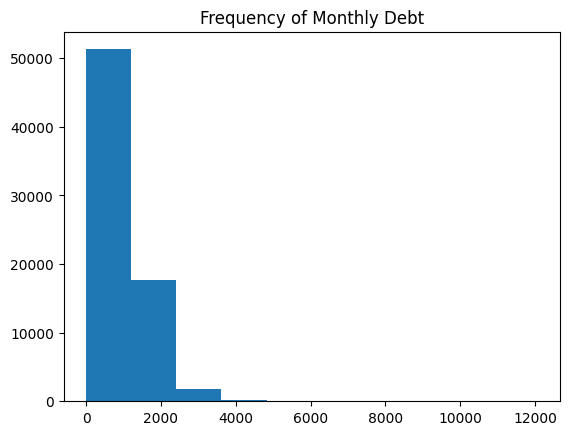

In [56]:
plt.hist(df7_adj_monthly_debt['Monthly Debt']);
plt.title('Frequency of Monthly Debt');

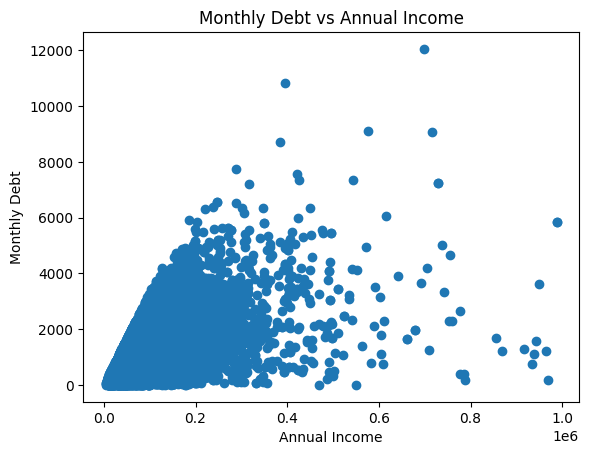

In [57]:
plt.scatter(df7_adj_monthly_debt['Annual Income'], df7_adj_monthly_debt['Monthly Debt'])
plt.title('Monthly Debt vs Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Monthly Debt');

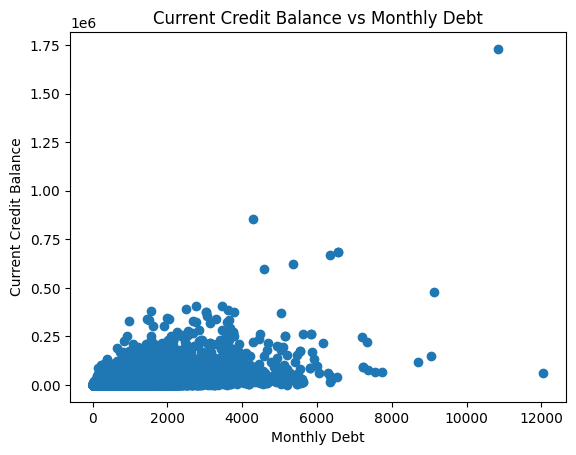

In [58]:
plt.scatter(df7_adj_monthly_debt['Monthly Debt'], df7_adj_monthly_debt['Current Credit Balance'])
plt.title('Current Credit Balance vs Monthly Debt')
plt.xlabel('Monthly Debt')
plt.ylabel('Current Credit Balance');

##### Observation: Monthly Debt is highly concentrated on the low end of the range, with many outliers on the high end. However, they seem to be accurate representation of the real world distribution.

### *Decision: Use the RobustScaler to scale the Monthly Debt feature

# 11. EDA of Years of Credit History

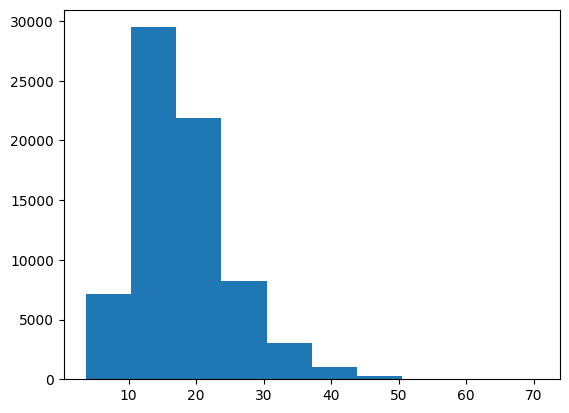

In [59]:
plt.hist(df7_adj_monthly_debt['Years of Credit History']);

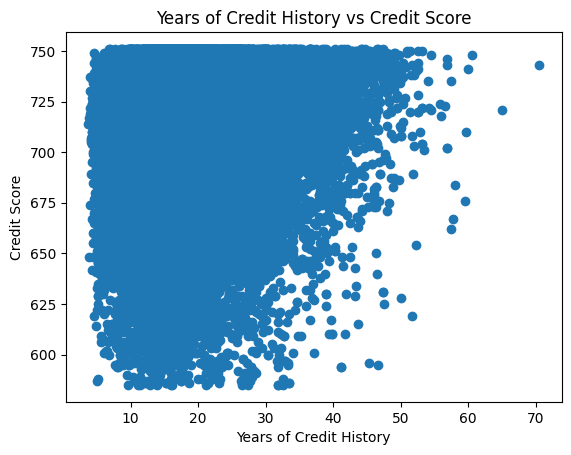

In [60]:
plt.scatter(df7_adj_monthly_debt['Years of Credit History'], df7_adj_monthly_debt['Credit Score'])
plt.title('Years of Credit History vs Credit Score')
plt.xlabel('Years of Credit History')
plt.ylabel('Credit Score');

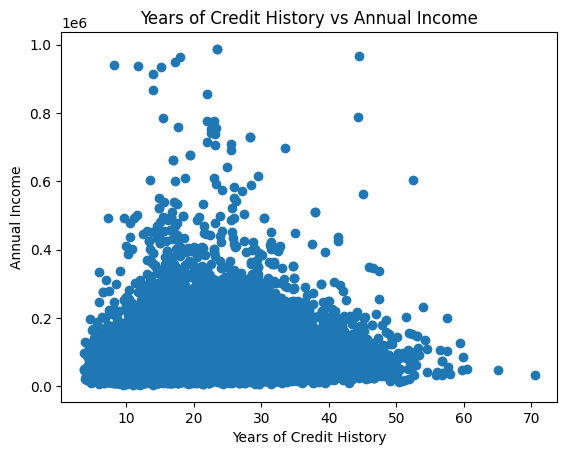

In [61]:
plt.scatter(df7_adj_monthly_debt['Years of Credit History'], df7_adj_monthly_debt['Annual Income'])
plt.title('Years of Credit History vs Annual Income')
plt.xlabel('Years of Credit History')
plt.ylabel('Annual Income');

##### Observation: Years of Credit History appears to be normally distributed, with a slight skew to the right. Base on the fisrt scatter plot, there may be a positive correlation between Years of Credit History and Credit Score. Based on teh second scatter plot, there may be a non-linear correlation between Years of Credit History and Annual Income.

### *Decision: use StandardScaler to scale Years of Credit History

# 12. EDA of Months since last delinquent

In [62]:
df7_adj_monthly_debt['Months since last delinquent'].describe()

count    33601.000000
mean        34.796107
std         21.913329
min          0.000000
25%         16.000000
50%         32.000000
75%         51.000000
max        176.000000
Name: Months since last delinquent, dtype: float64

In [63]:
df7_adj_monthly_debt['Months since last delinquent'].isna().sum()

np.int64(37554)

In [64]:
percent_missing = df7_adj_monthly_debt['Months since last delinquent'].isna().sum() / (df7_adj_monthly_debt.count()['Loan ID'])
print(f'Months since last delinquent is missing {int((percent_missing)*100)}% of values')

Months since last delinquent is missing 52% of values


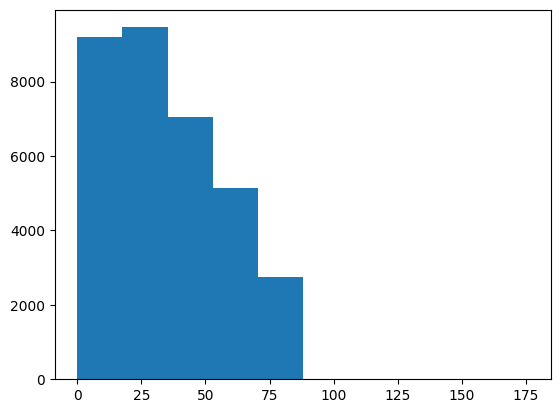

In [65]:
plt.hist(df7_adj_monthly_debt['Months since last delinquent']);

##### Observation: more than half the data is missing values for Months since last delinquent. Based on the feature name, it may not be able to account for customers who have never been delinquent. This means that those with missing values may have never been delinquent, which could be a strong indicator for our target.

### *Decision: Impute null values as 0, and transform Months since last delinquent into "Ever Delinquent", a binary feature, where 1 means they have been delinquent at some time in the past, and 0 means they have never been delinquent.

# 13. EDA of Number of Open Accounts

Text(0.5, 1.0, 'Frequency of Number of Open Accounts')

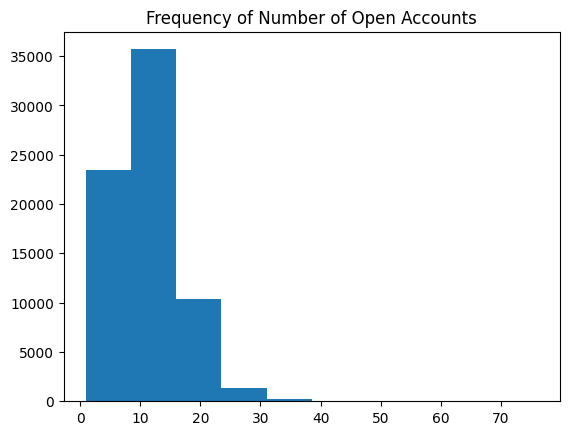

In [66]:
plt.hist(df7_adj_monthly_debt['Number of Open Accounts']);
plt.title('Frequency of Number of Open Accounts')

Text(0, 0.5, 'Number of Credit Problems')

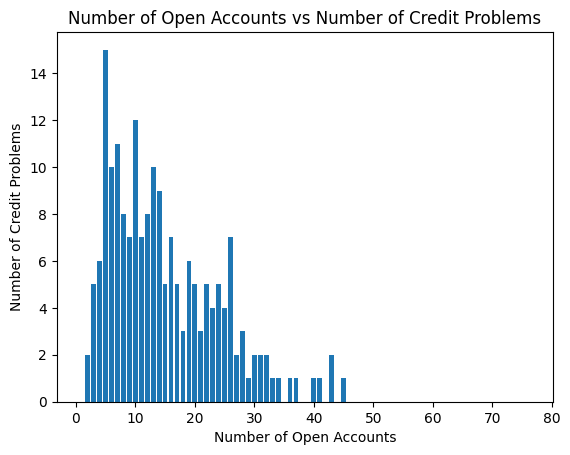

In [67]:
plt.bar(df7_adj_monthly_debt['Number of Open Accounts'], df7_adj_monthly_debt['Number of Credit Problems'])
plt.title('Number of Open Accounts vs Number of Credit Problems')
plt.xlabel('Number of Open Accounts')
plt.ylabel('Number of Credit Problems')

##### Observation: Number of Open Accounts appears to be roughly normally distributed, but is skewed to the right, with some large outliers. Based on the scatter plot, Number of Open Accounts may have a non-linear correlation with Number of Credit Problems. 

### *Decision: use RobustScaler for Number of Open Accounts

# 14. EDA of Number of Credit Problems

In [68]:
df7_adj_monthly_debt['Number of Credit Problems'].value_counts()

Number of Credit Problems
0     61272
1      8554
2       919
3       253
4        85
5        41
6        13
7         6
8         3
9         3
10        2
11        2
12        1
15        1
Name: count, dtype: int64

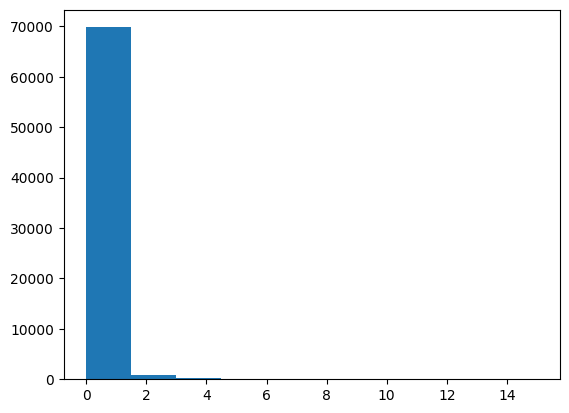

In [69]:
plt.hist(df7_adj_monthly_debt['Number of Credit Problems']);

##### Observation: vast majority of values in Number of Credit Problems are 0. Rather than considering how many credit problems a customer has, it would be more meaningful to distinguish those with credit problems versus those who do not have any credit problems.

### *Decision: transform Number of Credit Problems into a binary feature where 0 means no credit problems, and 1 means they have 1 or more credit problems.

# 15. EDA of Current Credit Balance

In [70]:
df7_adj_monthly_debt['Current Credit Balance'].describe()

count    7.115500e+04
mean     1.545310e+04
std      1.982742e+04
min      0.000000e+00
25%      5.925000e+03
50%      1.107500e+04
75%      1.933450e+04
max      1.730472e+06
Name: Current Credit Balance, dtype: float64

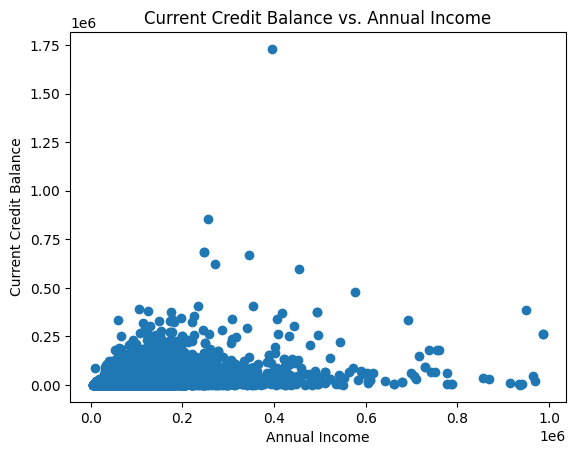

In [71]:
plt.scatter(df7_adj_monthly_debt['Annual Income'], df7_adj_monthly_debt['Current Credit Balance'])
plt.title('Current Credit Balance vs. Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Current Credit Balance');

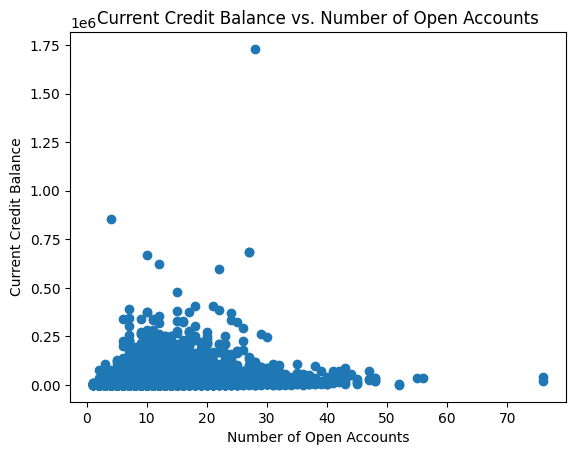

In [72]:
plt.scatter(df7_adj_monthly_debt['Number of Open Accounts'], df7_adj_monthly_debt['Current Credit Balance'])
plt.title('Current Credit Balance vs. Number of Open Accounts')
plt.xlabel('Number of Open Accounts')
plt.ylabel('Current Credit Balance');

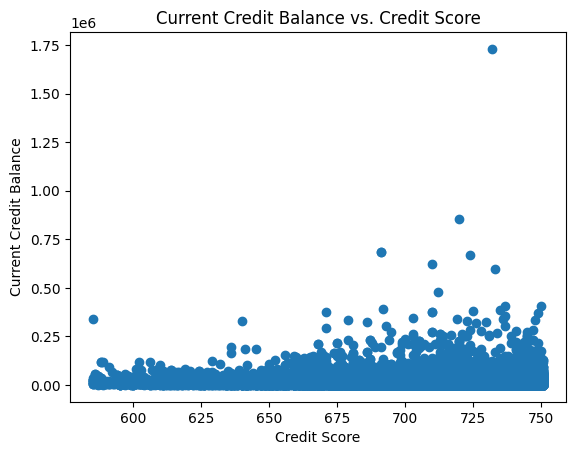

In [73]:
plt.scatter(df7_adj_monthly_debt['Credit Score'], df7_adj_monthly_debt['Current Credit Balance'])
plt.title('Current Credit Balance vs. Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Current Credit Balance');

##### Observation: There are some notable outliers in Current Credit Balance. However, these outliers do not stand out as bad data. These outliers should be addressed, either by dropping them, or using a scaler that will reduce the influence of outliers. Based on the scatter plots, the only notable relationship is that current Credit Balance seems to be positively correlated with Credit Score.

### *Decision: Use RobustScaler to scale Current Credit Balance.

# 16. EDA of Maximum Open Credit

In [74]:
df7_adj_monthly_debt['Maximum Open Credit'].apply(lambda X: type(X)).value_counts()

Maximum Open Credit
<class 'int'>    39698
<class 'str'>    31457
Name: count, dtype: int64

In [75]:
# df7_adj_monthly_debt['Maximum Open Credit'].apply(lambda X: pd.to_numeric(X))

##### Observation: Maximum Open Credit should contain numeric values, but there are 31457 strings. Upon trying to convert the strings into numbers, ValueError encounted an error while trying to parse string "#VALUE!". These rows should addressed before converting strings to numbers.

### *Decision: impute rows with '#VALUE!' with the median, then convert to numeric. For the purpose of EDA, will drop these rows for now.

In [76]:
df8_adj_open_credit = df7_adj_monthly_debt.loc[df7_adj_monthly_debt['Maximum Open Credit'] != '#VALUE!'].copy()

In [77]:
df8_adj_open_credit['Maximum Open Credit'] = df8_adj_open_credit['Maximum Open Credit'].apply(lambda X: pd.to_numeric(X))

In [78]:
df8_adj_open_credit['Maximum Open Credit'].apply(lambda X: type(X)).value_counts()

Maximum Open Credit
<class 'int'>    71154
Name: count, dtype: int64

Text(0, 0.5, 'Maximum Open Credit')

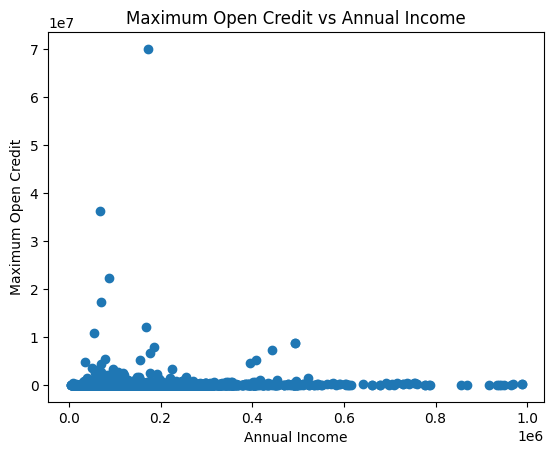

In [79]:
plt.scatter(df8_adj_open_credit['Annual Income'], df8_adj_open_credit['Maximum Open Credit'])
plt.title('Maximum Open Credit vs Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Maximum Open Credit')

Text(0, 0.5, 'Maximum Open Credit')

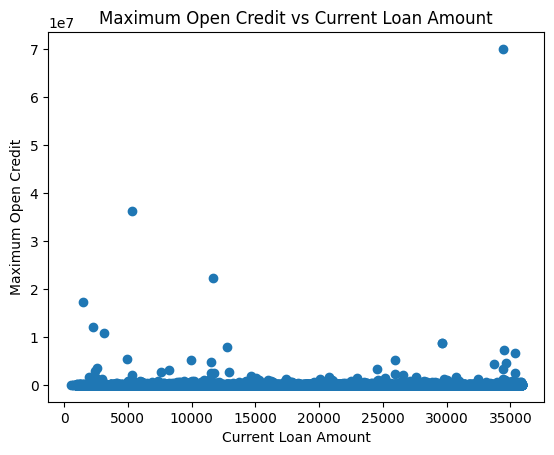

In [80]:
plt.scatter(df8_adj_open_credit['Current Loan Amount'], df8_adj_open_credit['Maximum Open Credit'])
plt.title('Maximum Open Credit vs Current Loan Amount')
plt.xlabel('Current Loan Amount')
plt.ylabel('Maximum Open Credit')

##### Observation: there are notable outliers in Maximum Open Credit.

### *Decision: use the RobustScaler to scale Maximum Open Credit.

# 17. EDA of Bankruptcies

In [81]:
df8_adj_open_credit['Bankruptcies'].value_counts()

Bankruptcies
0.0    63196
1.0     7438
2.0      277
3.0       75
4.0       19
5.0        5
7.0        1
6.0        1
Name: count, dtype: int64

In [82]:
df8_adj_open_credit['Bankruptcies'].isna().sum()

np.int64(142)

##### Observation: vast majority of bankruptcies are 0. There is indicative power in combining all the bankruptcies into one bin and comparing it with those with 0 bankruptcies. There are 142 rows with null values. It appears that these may be missing at random.

### *Decision: convert into a binary feature, where 0 means no bankruptices, and 1 means any number of bankruptcies. Drop nulls.

# 18. EDA of Tax Liens

In [83]:
df8_adj_open_credit['Tax Liens'].value_counts()

Tax Liens
0.0     69779
1.0       949
2.0       270
3.0        69
4.0        46
5.0        14
6.0         7
7.0         6
9.0         3
11.0        2
15.0        1
10.0        1
8.0         1
Name: count, dtype: int64

In [84]:
df8_adj_open_credit['Tax Liens'].isna().sum()

np.int64(6)

##### Observation: similar to bankruptices, vast majority of values are 0. There are also 6 null values that are missing at random. 

### *Decision: convert Bankruptcies into a binary feature, where 0 = no tax liens, and 1 = any number of tax liens. Drop nulls.

# Final Drop Duplicates

In [85]:
df8_adj_open_credit.duplicated().sum()

np.int64(6657)

In [86]:
df9_drop_dup = df8_adj_open_credit.drop_duplicates()

In [87]:
df9_drop_dup.duplicated().sum()

np.int64(0)

### Check for duplicates in Loan ID

In [88]:
df9_drop_dup['Loan ID'].duplicated().sum()

np.int64(0)

In [90]:
df9_drop_dup.to_csv('Data/loandata_cleaned.csv', index=False)